In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

data = pd.read_csv("AMZN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [1735]:
data=data[['Date',"Close"]]
dates=data['Date']
data.set_index('Date')

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2023-03-30,102.000000
2023-03-31,103.290001
2023-04-03,102.410004


<AxesSubplot:>

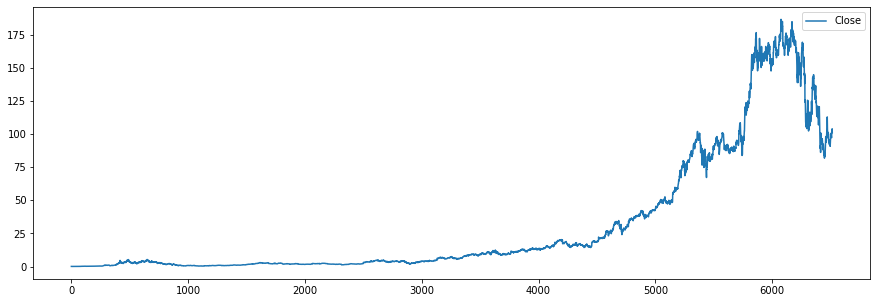

In [1736]:
data.plot(figsize=(15,5))

In [1737]:
from copy import deepcopy as dc 

def prepare_df(df,lookback):
    df=dc(df)
    
    for i in range(1, lookback+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback=7
df=prepare_df(data,lookback)
df = df.set_index("Date")
df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [1738]:
df_as_np=df.to_numpy()
df_as_np

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [1739]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(-1,1))
df_as_np=scaler.fit_transform(df_as_np)

df_as_np

array([[-0.99991063, -0.99995531, -1.        , ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99993855, -0.99991063, -0.99994415, ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99995253, -0.99993855, -0.99989946, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09747299,  0.10690997,  0.09308121, ...,  0.0506149 ,
         0.05158   ,  0.05779984],
       [ 0.11398769,  0.09747299,  0.10691495, ...,  0.04203581,
         0.0506149 ,  0.05158   ],
       [ 0.08342464,  0.11398769,  0.09747802, ...,  0.07431453,
         0.04203581,  0.0506149 ]])

In [1740]:
X=df_as_np[:,1:]
Y=df_as_np[:,0]

X=dc(np.flip(X,axis=1))

In [1741]:
split_index= int(len(X)*0.95)
split_index

c:\Users\user\Anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


6183

In [1742]:
X_train=X[:split_index]
X_test=X[split_index:]
y_train=Y[:split_index]
y_test=Y[split_index:]

In [1743]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

In [1744]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [1745]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [1746]:
def train(x, y, my_nn, loss_fn, optimizer, learning_rate, num_epoch, x_val, y_val):
    my_nn.train()
    optimizer = optimizer(my_nn.parameters(), lr=learning_rate)
    train_loss = []
    val_loss = []

    for epoch in range(num_epoch):
        my_nn.zero_grad()
        y_hat = my_nn(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())

        # Évaluer sur les données de validation
        my_nn.eval()
        with torch.no_grad():
            y_val_hat = my_nn(x_val)
            current_val_loss = loss_fn(y_val_hat, y_val).item()
            val_loss.append(current_val_loss)

        my_nn.train()
    return train_loss,val_loss


In [1747]:
loss_fn=nn.MSELoss()
optimizer = torch.optim.Adam
learning_rate=0.02
num_epoch=80



train_loss,val_loss=train(X_train,y_train,model,loss_fn,optimizer,learning_rate,num_epoch,X_test,y_test)

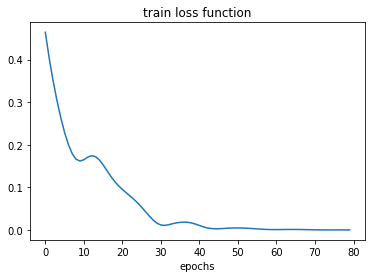

In [1748]:
def plot_results(loss, my_nn,name:str): #function to plot loss curve and learned function curve 
    
    # plot loss
    plt.figure()
    plt.plot(loss)
    plt.title(name+' loss function')
    plt.xlabel('epochs')

plot_results(train_loss,model,'train')

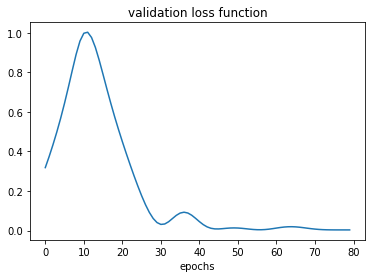

In [1749]:
plot_results(val_loss,model,'validation')

In [1750]:
pred=model(X_test)
pred=pred.detach().numpy()
                                                         
pred=pd.DataFrame(pred)
y_test=pd.DataFrame(y_test)


dates = pd.to_datetime(dates)

In [1751]:
fin=int(0.05*len(dates))+1
test_dates=dates[-fin:]

pred=pred.set_index(test_dates)

y_test=y_test.set_index(test_dates)

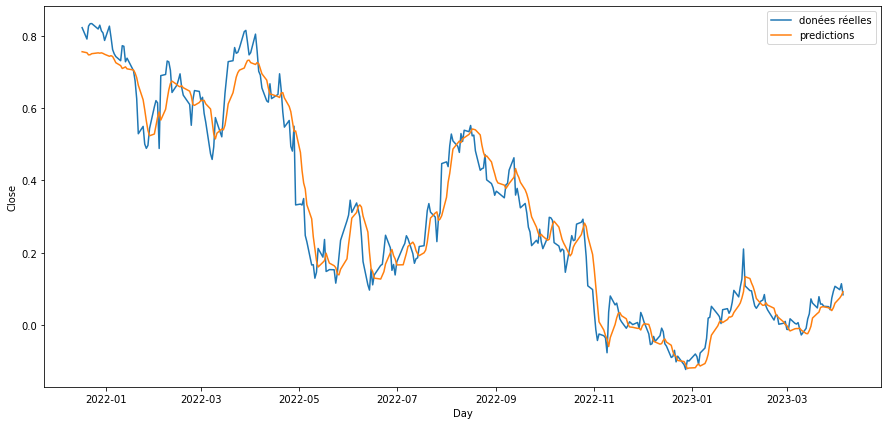

In [1752]:
fs=(15,7)
plt.figure(figsize=fs)

plt.plot(y_test.index, y_test, label='donées réelles')
plt.plot(pred.index, pred, label='predictions')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [1753]:
y_test=y_test.to_numpy().flatten()
pred=pred.to_numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))  # we try to output the close value at the real scale 
dummies[:, 0] = pred
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([163.80965961, 163.54796094, 162.98942515, 163.03662473,
       163.30304781, 163.51424537, 163.43347472, 163.52061498,
       163.37770451, 163.15075523, 162.63313835, 162.78667594,
       162.57207681, 161.81197013, 160.97314931, 160.2262265 ,
       159.48330553, 159.66383337, 159.90155429, 159.38785033,
       159.09583766, 158.31793386, 157.1123325 , 155.16680045,
       151.41086543, 148.83554245, 145.96211509, 143.51280588,
       142.12762156, 142.56574617, 144.67688806, 146.87075705,
       148.25858704, 146.16726541, 148.95006201, 151.55762211,
       153.9609323 , 155.59774396, 156.2241889 , 155.34718377,
       154.94389748, 154.76319178, 155.02524617, 154.52756071,
       153.62559962, 152.39508675, 150.16378935, 149.97120039,
       150.70252711, 151.28030512, 151.18035895, 151.26171875,
       150.37086278, 149.0276423 , 145.70502967, 142.56342287,
       141.30730929, 142.80201086, 143.86160033, 143.64017583,
       144.86621996, 147.45056934, 150.35352144, 153.23

In [1754]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([170.01749949, 167.07899763, 170.41700626, 171.03700377,
       171.0684961 , 169.66949429, 170.66099675, 169.20100565,
       168.64449858, 166.71699707, 170.40449492, 167.52200227,
       164.35699578, 163.25399737, 162.55400179, 161.48599177,
       165.36199892, 165.20699954, 161.21400501, 162.13799851,
       158.91749416, 156.29899568, 151.66749509, 142.64300408,
       144.54400445, 139.98599336, 138.87249844, 139.63749627,
       143.97799855, 149.57350001, 151.19349835, 150.61250219,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949925, 159.003495  , 153.29350176, 155.1670061 ,
       156.51049894, 158.10049453, 154.6524962 , 152.60149876,
       150.19749381, 144.82699629, 151.35800212, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.64100565, 137.45300383, 136.01449488, 139.27900567,
       146.81750468, 145.52450739, 141.8529947 , 147.36650272,
       153.10400311, 157.23899657, 161.25050521, 161.49

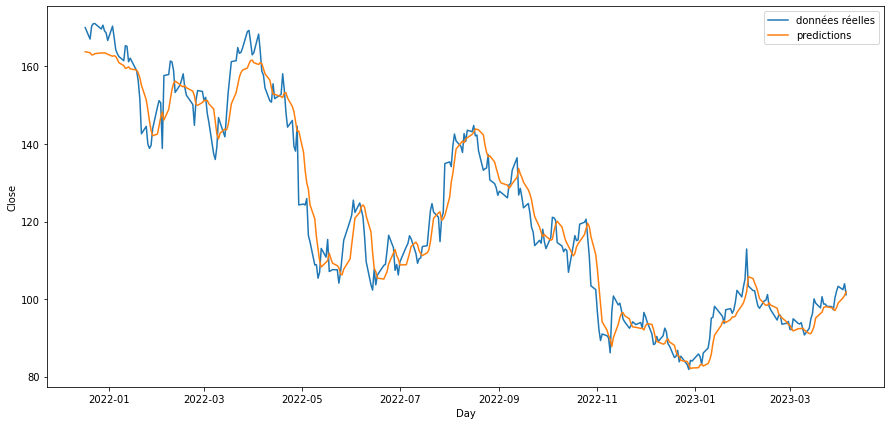

In [1755]:
fs=(15,7)
plt.figure(figsize=fs)

plt.plot(test_dates, new_y_test, label='données réelles')
plt.plot(test_dates, test_predictions, label='predictions')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

## Trying XGB

In [30]:
import xgboost as xgb
fs=(15,6)

In [50]:
df=data[['Date','Close','Volume']].set_index("Date")
df.index=pd.to_datetime(df.index)

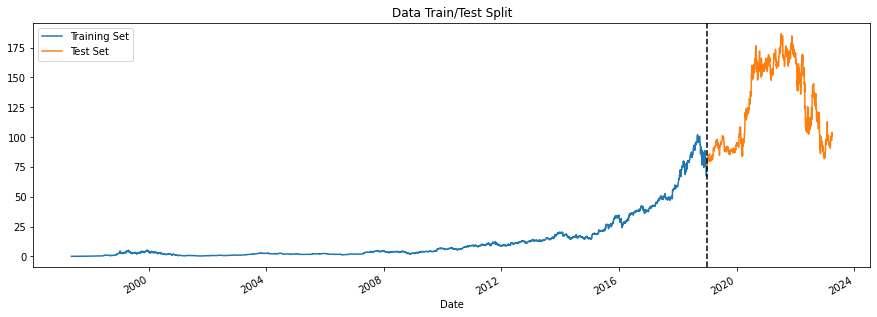

In [54]:
# Train / Test split

train = df.loc[df.index < '01-01-2019']
test = df.loc[df.index >= '01-01-2019']

fig, ax = plt.subplots(figsize=(15, 5))
train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='Test Set')
ax.axvline('01-01-2019', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [45]:
# Lets create features

df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week

In [ ]:
model=xgb.XGBRegressor(n_estimators=1000)
